In [20]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pandas import DataFrame


ATTENDANCE_PATH = os.path.join("datasets", "attendance")

def load_attendance_data(attendance_path=ATTENDANCE_PATH):
    csv_path = os.path.join(attendance_path, "stud-stat-anonymous.csv")
    return pd.read_csv(csv_path)

In [21]:
attendance = load_attendance_data()
attendance.head()

,Unnamed: 0,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
0,0,214366,100%,Web and Soft Electives,Big Data,100%,NaN,NaN,NaN,NaN,NaN,NaN
1,1,680092,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
2,2,906441,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
3,3,432875,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
4,4,146518,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN


In [22]:
attendance = attendance.drop(['Unnamed: 0'], axis=1)
attendance.head()

,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
0,214366,100%,Web and Soft Electives,Big Data,100%,NaN,NaN,NaN,NaN,NaN,NaN
1,680092,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
2,906441,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
3,432875,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
4,146518,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN


In [23]:
transform_func = dict(
        Fag=attendance.filter(regex="^Fag").columns,
        Fravær=attendance.filter(regex="^Fravær").columns
)

transformed_attendance = pd.lreshape(attendance, transform_func)
transformed_attendance = transformed_attendance[transformed_attendance["Samlet fravær"].str.strip("%").astype("float") > 35]
transformed_attendance["Samlet fravær"] = [x.strip('%') for x in transformed_attendance["Samlet fravær"]]
transformed_attendance["Fravær"] = [x.strip('%') for x in transformed_attendance["Fravær"]]

distinct_classes = list(set(transformed_attendance["Klasse"]))


transformed_attendance = transformed_attendance.drop(['Fag'], axis=1)
transformed_attendance = transformed_attendance.drop(['Klasse'], axis=1)

transformed_attendance = transformed_attendance.sort_values("Id")

transformed_attendance.head()

,Id,Samlet fravær,Fravær
53,104328,57.5,55.56
276,104328,57.5,87.5
480,104328,57.5,33.33
249,105304,90.9,100
26,105304,90.9,80


In [24]:
distinct_classes

['SD19w1', 'Web19w1', 'ITS18a', 'SD18i', 'Web and Soft Electives', 'ITS19w1']

In [25]:
continuous_features = ['Samlet fravær', 'Fravær']

transformed_attendance[continuous_features].describe()


,Samlet fravær,Fravær
count,291,291
unique,53,69
top,100,100
freq,53,86


In [26]:
mms = MinMaxScaler()
mms.fit(transformed_attendance)
data_transformed = mms.transform(transformed_attendance)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
# For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transformed_attendance)
    Sum_of_squared_distances.append(km.inertia_)


In [28]:
Sum_of_squared_distances

[17725762980875.867,
 4378033429759.323,
 1846934778691.2666,
 1087997136194.2192,
 659502769199.778,
 455872679357.26526,
 336778014534.7201,
 269423228478.22394,
 205778165652.1394,
 158961444244.0938,
 136562390076.42944,
 110975068910.01266,
 89239860483.95969,
 68616613482.338486]

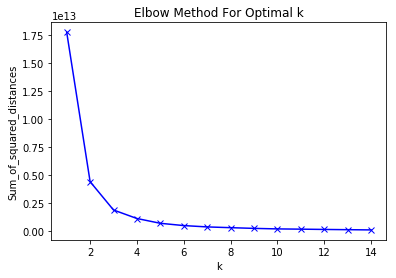

In [29]:
# Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.
# In the plot below, the elbow is at k=3 indicating the optimal k for this dataset is 3


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

[[54.52376238 63.78891089]
 [48.44       15.61263158]
 [93.06736842 97.69010526]]


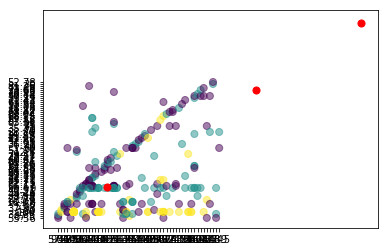

In [44]:
df = DataFrame(transformed_attendance,columns=['Samlet fravær','Fravær'])
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Samlet fravær'], df['Fravær'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 1], c='red', s=50)
